1 -Importação das bibliotecas e configuração de avisos.

2 -Carregamento dos dados e pré-processamento (divisão e normalização).

3 -Treinamento e avaliação da Regressão Logística com matriz de confusão e relatório de classificação.

4 -Treinamento e avaliação do MLP Classifier com matriz de confusão e relatório de classificação.

5 -Comparação final entre os resultados dos dois modelos.

Essa abordagem permite que você obtenha conclusões eficientes comparando os dois métodos de classificação (Regressão Logística e Rede Neural MLP).

Segue o features atualizados:

features = ['Monthly_Salary','Work_Hours_Per_Week','Training_Hours','Years_At_Company']

In [ ]:
import pandas as pd
df = pd.read_csv('/home/Extended_Employee_Performance_and_Productivity_Data.csv')
df.head(5)


,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [ ]:
print(len(df))
print(df['Resigned'].value_counts())

100000
Resigned
False    89990
True     10010
Name: count, dtype: int64


In [ ]:
# balancear amostra
df_resigned = df[df['Resigned']==True]
df_not_resigned = df[df['Resigned']==False]
print(df_resigned['Resigned'].value_counts())
print(df_not_resigned['Resigned'].value_counts())


Resigned
True    10010
Name: count, dtype: int64
Resigned
False    89990
Name: count, dtype: int64


In [ ]:
df_resigned = df_resigned.sample(n=50)
df_not_resigned = df_not_resigned.sample(n=50)
df1 = pd.concat([df_resigned, df_not_resigned])
df1['Resigned'].value_counts()

,count
Resigned,
True,50
False,50


0.72


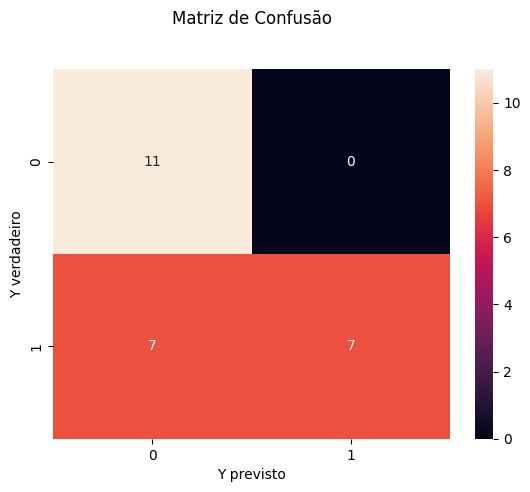

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


def reglin_train_evaluate(df, features, target):
  df = df.dropna(subset=features)
  df = df.dropna(subset=target)
  x = df[features]
  y = df[target]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

  model = LogisticRegression(max_iter=3000)
  model.fit(x_train, y_train)

  y_predicted = model.predict(x_test)
  print(accuracy_score(y_test, y_predicted))

  matriz_confusao = confusion_matrix(y_test, y_predicted)
  sns.heatmap(pd.DataFrame(matriz_confusao), annot=True, fmt='g')
  plt.title("Matriz de Confusão", y=1.1)
  plt.ylabel("Y verdadeiro")
  plt.xlabel("Y previsto")

features = ['Monthly_Salary','Work_Hours_Per_Week','Training_Hours','Years_At_Company']
target = 'Resigned'
reglin_train_evaluate(df1, features, target)

In [ ]:
def mlpclassifier_train_evaluate(df, features, target):
  df = df.dropna(subset=features)
  df = df.dropna(subset=target)
  x = df[features]
  y = df[target]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

  ss = StandardScaler()
  x_train_scaled = ss.fit_transform(x_train)
  x_test_scaled = ss.transform(x_test)

  model = MLPClassifier(hidden_layer_sizes=(10,8,8),
                          max_iter = 20000,
                          activation = 'tanh',
                          alpha = 0.05,
                          solver = 'adam',
                          learning_rate = 'constant')
  model.fit(x_train_scaled, y_train)

  y_pred = model.predict(x_test_scaled)
  print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))

features = ['Monthly_Salary','Work_Hours_Per_Week','Training_Hours','Years_At_Company']
target = 'Resigned'
mlpclassifier_train_evaluate(df1, features, target)

Accuracy: 0.5200


In [ ]:
from warnings import simplefilter
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

def mlpclassifier_train_evaluate(df, features, target):
  df = df.dropna(subset=features)
  df = df.dropna(subset=target)
  x = df[features]
  y = df[target]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

  ss = StandardScaler()
  x_train_scaled = ss.fit_transform(x_train)
  x_test_scaled = ss.transform(x_test)

  # optimizing
  parameters = {
    'hidden_layer_sizes': [(5,), (10,), (10, 5,), (20, 10,)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'learning_rate': ['constant', 'adaptive'],
  }
  nn = MLPClassifier(max_iter=500)
  clf = GridSearchCV(nn, parameters, refit=True, return_train_score=True)
  clf.fit(x_train_scaled, y_train.values.ravel())

  print("Melhores parâmetros:")
  print(clf.best_params_)

  nn_optimized = clf.best_estimator_

  y_pred = nn_optimized.predict(x_test_scaled)
  print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))

features = ['Monthly_Salary','Work_Hours_Per_Week','Training_Hours','Years_At_Company']
target = 'Resigned'
mlpclassifier_train_evaluate(df1, features, target)

Melhores parâmetros:
{'activation': 'tanh', 'hidden_layer_sizes': (20, 10), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
Accuracy: 0.5200
